# Importing Packages



In [1]:
#basic packeges 
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import wordcloud
from textblob import TextBlob
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk import word_tokenize
from nltk.stem.isri import ISRIStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection, naive_bayes, svm
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
#Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim.models import Word2Vec
#for model save
import joblib
#other
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading Data

In [2]:
read_file = pd.read_excel (r"D:\final_data.xlsx")
  
# Write the dataframe object
# into csv file
read_file.to_csv (r"D:\final_data.csv",
                  index = None,
                  header=True)

df0 = pd.DataFrame(pd.read_csv(r"D:\final_data.csv"))

# Exploratory Data Analysis (EDA)

In [3]:
# dataframe shape
df0=pd.read_csv(r"D:\final_data.csv")
print(df0.shape)
df0.head()

(1800, 2)


,label,text
0,اكتئاب,#$حاسس انى هنت
1,اكتئاب,حاسس بالاكتئاب بسبب انى مش مرغوب فيه
2,اكتئاب,حاسس بالاكتئاب والإحباط بسبب المشاكل و الفشل
3,اكتئاب,"مش عارف اركز ولا عارف الاقي لحظه هدوء, افكاري..."
4,اكتئاب,حاسس بالاكتئاب واليأس والدنيا أسودت فى وشي وال...


اكتئاب           600
ميول انتحاريه    600
القلق            600
Name: label, dtype: int64


<AxesSubplot:ylabel='label'>

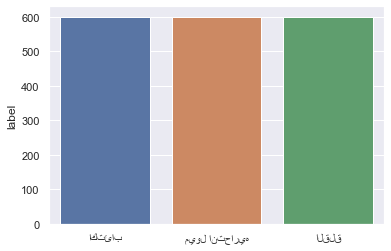

In [4]:
# CLASS DISTRIBUTION
#if dataset is balanced or not
x=df0['label'].value_counts()
print(x)
#sns.barplot(x="Item_Type", y="Item_MRP", data=data_BM[:5])
sns.barplot(x.index,x)


In [5]:
#Missing values
df0.isna().sum()

label    0
text     0
dtype: int64

In [6]:
#data info
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1800 non-null   object
 1   text    1800 non-null   object
dtypes: object(2)
memory usage: 28.2+ KB


length analysis

In [7]:
# char-Length for each sentence

df0["length"] = df0["text"].apply(len)
print(df0["length"])


0        15
1        36
2        46
3       115
4        61
       ... 
1795    187
1796     66
1797    172
1798    120
1799     87
Name: length, Length: 1800, dtype: int64


In [8]:
#1. WORD-COUNT "counts the number of tokens in the text (separated by a space)"
print("word_count\n")
df0['word_count'] = df0['text'].apply(lambda x: len(str(x).split()))
print(df0[df0['label']=='اكتئاب']['word_count'].mean()) 
print(df0[df0['label']=='القلق']['word_count'].mean())
print(df0[df0['label']=='ميول انتحاريه']['word_count'].mean())
print("charachter_count\n")
#2. CHARACTER-COUNT "sum the number of characters of each token"
df0['char_count'] = df0['text'].apply(lambda x: len(str(x)))
print(df0[df0['label']=='اكتئاب']['char_count'].mean()) 
print(df0[df0['label']=='القلق']['char_count'].mean())
print(df0[df0['label']=='ميول انتحاريه']['char_count'].mean())
print("unique word_count\n")
#3. UNIQUE WORD-COUNT
df0['unique_word_count'] = df0['text'].apply(lambda x: len(set(str(x).split())))
print(df0[df0['label']=='اكتئاب']['unique_word_count'].mean()) #Disaster tweets
print(df0[df0['label']=='القلق']['unique_word_count'].mean()) 
print(df0[df0['label']=='ميول انتحاريه']['unique_word_count'].mean())#Non-Disaster tweets

word_count

11.051666666666666
13.733333333333333
13.068333333333333
charachter_count

56.53666666666667
70.67833333333333
67.59
unique word_count

10.731666666666667
13.128333333333334
12.546666666666667


In [9]:
df0['avg_word_length'] = df0['char_count'] / df0['word_count']

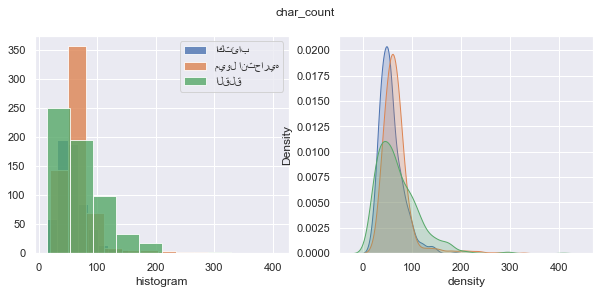

In [10]:
# plot char_count "sum the number of characters of each token"
x= "char_count"
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
fig.suptitle(x, fontsize=12)
for i in df0['label'].unique():
    sns.distplot(df0[df0['label']==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(df0[df0['label']==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(df0['label'].unique())
ax[1].grid(True)
plt.show()

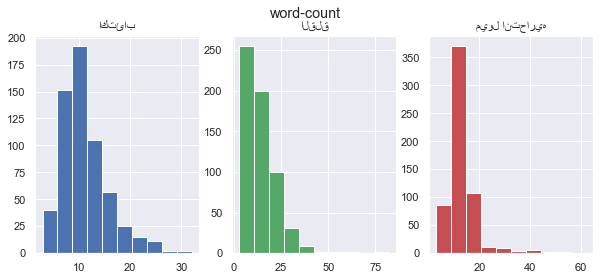

In [11]:
#Plotting word-count per sentence
fig,ax =plt.subplots(nrows=1, ncols=3,figsize=(10,4))
train_words=df0[df0['label']=='اكتئاب']['word_count']
ax[0].hist(train_words,color='b')
ax[0].set_title('اكتئاب')
train_words=df0[df0['label']=='القلق']['word_count']
ax[1].hist(train_words,color='g')
ax[1].set_title('القلق')
train_words=df0[df0['label']=='ميول انتحاريه']['word_count']
ax[2].hist(train_words,color='r')
ax[2].set_title('ميول انتحاريه')

fig.suptitle("word-count")
plt.show()

# Pre-processing

In [12]:
#list of arabic_diacritics"علامات التشكيل"
arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                              """, re.VERBOSE)

In [13]:
stop_words = list(set(stopwords.words('arabic')))
print(stop_words)

['ذانِ', 'ذانك', 'ليت', 'يا', 'بما', 'اثنين', 'إياه', 'لكم', 'هكذا', 'أولالك', 'اخلولق', 'آذار', 'آناء', 'ثمان', 'دال', 'لعمر', 'رويدك', 'ريث', 'ثلاث', 'تاء', 'ذهب', 'أولئك', 'تانِ', 'انبرى', 'حيثما', 'أقل', 'درى', 'غداة', 'ك', 'ؤ', 'عين', 'ذِي', 'جويلية', 'هاته', 'أينما', 'هَؤلاء', 'بخ', 'عاد', 'كل', 'يفعلان', 'يفعلون', 'لك', 'إليكنّ', 'لكما', 'جلل', 'كلا', 'لكي', 'به', 'لعلَّ', 'اثنا', 'بؤسا', 'مكانَك', 'ثم', 'إياك', 'س', 'هنالك', 'سنتيم', 'حدَث', 'بهما', 'أربعة', 'وما', 'على', 'ثلاثاء', 'تسعون', 'متى', 'غين', 'بس', 'ثلاثون', 'صباح', 'اللذين', 'لا سيما', 'ثمانمئة', 'هيت', 'أغسطس', 'إلا', 'واهاً', 'تانِك', 'ذيت', 'آنفا', 'مازال', 'ديسمبر', 'شباط', 'زاي', 'يناير', 'هَذانِ', 'إياهن', 'إليك', 'غالبا', 'ثمانية', 'ميم', 'لهن', 'ظنَّ', 'آمينَ', 'أولاء', 'حمو', 'لولا', 'ولكن', 'صبرا', 'لن', 'إحدى', 'ستين', 'اللتيا', 'غادر', 'جنيه', 'خ', 'بئس', 'فيها', 'تفعلون', 'جمعة', 'بكن', 'معاذ', 'آض', 'لوما', 'نيسان', 'أمامك', 'خبَّر', 'مما', 'إياها', 'ذلك', 'لئن', 'هَاتانِ', 'تفعلان', 'تفعلين', 'حمدا',

In [14]:
#apply regular expressison
print("apply regular expressison\n")
data=df0['text']
def preprocess(data):
    
    #text=text.strip()  #get rid of leading/trailing whitespace 
    data=re.compile('<.*?>').sub('', data) #Remove HTML tags/markups

    data = re.sub(arabic_diacritics, '', data)
    data = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', data)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    data = re.sub('\s+', ' ', data)  #Remove extra space and tabs
    data = re.sub(r'\[[0-9]*\]',' ',data) #[0-9] matches any digit (0 to 10000...)
    data=re.sub(r'[^\w\s]', '', str(data).strip())
    data = re.sub(r'\d',' ',data) #matches any digit from 0 to 100000..., \D matches non-digits
    data = re.sub(r'\s+',' ',data) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return data
data=preprocess(str(data))
print(data)


apply regular expressison

 حاسس انى هنت حاسس بالاكتئاب بسبب انى مش مرغوب فيه حاسس بالاكتئاب والإحباط بسبب المشاكل و الفشل مش عارف اركز ولا عارف الاقي لحظه هدوء افكاري حاسس بالاكتئاب واليأس والدنيا أسودت فى وشي وال معنديش اي اصدقاء وانا من زعلانه من دا وبسال ن حاسه بقلق وتوتر بسبب المماطله ولكن باين كدا ان حاسه بانى حطام مش هقدر اعمل حاجه وحاسه بالاحب العالم ليس له معنىحاسه انى فقدت نفسي واصحابي حاسس بالاكتئاب والحزن لما بلاقي حياتي بتنهارقد Name text Length dtype object


In [15]:
#remove emoji
print("remove emoji\n")
def remove_emoji(data):
    t = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return t.sub(r'',data)
text=remove_emoji(str(data))
print(text)

#remove stopwords
print("\nremove stopwords\n")
def stopword(data):
    a= [i for i in data.split() if i not in stopwords.words('arabic')]
    return ' '.join(a)

text=stopword(str(data))
print(text)


#stem words
print("\n stemmed text\n")
st = ISRIStemmer()
def stemming(data):
    a=[st.stem(i) for i in word_tokenize(data) ]
    return ' '.join(a)
text=stemming(str(data))
print(text)



remove emoji

 حاسس انى هنت حاسس بالاكتئاب بسبب انى مش مرغوب فيه حاسس بالاكتئاب والإحباط بسبب المشاكل و الفشل مش عارف اركز ولا عارف الاقي لحظه هدوء افكاري حاسس بالاكتئاب واليأس والدنيا أسودت فى وشي وال معنديش اي اصدقاء وانا من زعلانه من دا وبسال ن حاسه بقلق وتوتر بسبب المماطله ولكن باين كدا ان حاسه بانى حطام مش هقدر اعمل حاجه وحاسه بالاحب العالم ليس له معنىحاسه انى فقدت نفسي واصحابي حاسس بالاكتئاب والحزن لما بلاقي حياتي بتنهارقد Name text Length dtype object

remove stopwords

حاسس انى هنت حاسس بالاكتئاب بسبب انى مش مرغوب حاسس بالاكتئاب والإحباط بسبب المشاكل الفشل مش عارف اركز عارف الاقي لحظه هدوء افكاري حاسس بالاكتئاب واليأس والدنيا أسودت فى وشي وال معنديش اي اصدقاء وانا زعلانه دا وبسال حاسه بقلق وتوتر بسبب المماطله باين كدا ان حاسه بانى حطام مش هقدر اعمل حاجه وحاسه بالاحب العالم معنىحاسه انى فقدت نفسي واصحابي حاسس بالاكتئاب والحزن بلاقي حياتي بتنهارقد Name text Length dtype object

 stemmed text

حسس انى هنت حسس كئب سبب انى مش رغب فيه حسس كئب حبط سبب شكل و فشل مش عرف ركز ولا عرف اقي 

In [16]:
#create target column
df0["label"] = df0["label"].astype('category')
df0.dtypes
df0["target"] = df0["label"].cat.codes
df0["target"].value_counts()
df0["target"] = df0["target"].astype('category')
df0.dtypes

label                category
text                   object
length                  int64
word_count              int64
char_count              int64
unique_word_count       int64
avg_word_length       float64
target               category
dtype: object

In [17]:
#num of words before cleaning
df0['text'].apply(lambda x: len(x.split(' '))).sum()

23495

In [18]:
#final preprocessing function
def finalpreprocess(data):
    dd=stemming(stopword( remove_emoji(preprocess(data))))
    return str(dd)

df0['clean_text'] = df0['text'].apply(lambda x: finalpreprocess(x))
df0['target']


df0=df0.drop(columns=['length','avg_word_length'])
df0.head()
df0.drop(['word_count','char_count','unique_word_count'], axis = 1)

,label,text,target,clean_text
0,اكتئاب,#$حاسس انى هنت,0,حسس انى هنت
1,اكتئاب,حاسس بالاكتئاب بسبب انى مش مرغوب فيه,0,حسس كئب سبب انى مش رغب
2,اكتئاب,حاسس بالاكتئاب والإحباط بسبب المشاكل و الفشل,0,حسس كئب حبط سبب شكل فشل
3,اكتئاب,"مش عارف اركز ولا عارف الاقي لحظه هدوء, افكاري...",0,مش عرف ركز عرف اقي لحظ هدء فكر خنق عقل وكه يجر...
4,اكتئاب,حاسس بالاكتئاب واليأس والدنيا أسودت فى وشي وال...,0,حسس كئب يأس دنا اسد فى وشي حية لهش عنى
...,...,...,...,...
1795,القلق,معنديش اي اصدقاء وانا من زعلانه من دا وبسال ن...,1,معنديش اي صدقاء ونا زعل دا بسل نفس انا لزم عمل...
1796,القلق,حاسه بقلق وتوتر بسبب المماطله ولكن باين كدا ان...,1,حسه قلق وتر سبب مطل بين كدا ان ده للى هعمل داي
1797,القلق,حاسه بانى حطام مش هقدر اعمل حاجه، وحاسه بالاحب...,1,حسه بنى حطم مش هقدر عمل حجه وحس حبط قلق وحس ان...
1798,القلق,العالم ليس له معنى،حاسه انى فقدت نفسي واصحابي...,1,علم معنىحاسه انى فقد نفس صحب بقش عند حمس لحج ح...


In [19]:
#num of words after cleaning
df0['clean_text'].apply(lambda x: len(x.split(' '))).sum()

19307

# Feature Engineering

In [20]:
#create bag of words model
cv=CountVectorizer()
x=cv.fit_transform(df0['clean_text']).toarray()
import pandas
dataframe_array= pandas.DataFrame(x)
dataframe_array.to_csv(r"I:\bow.csv")

In [21]:
#create tf-idf model
tf=TfidfVectorizer()
y=tf.fit_transform(df0['clean_text']).toarray()
df_tf=pandas.DataFrame(y)
dataframe_array.to_csv(r"I:\tfidf.csv")

In [22]:
# create Word2vec model
df0['clean_text_tok']=[nltk.word_tokenize(i) for i in df0['clean_text']] 
model = Word2Vec(df0['clean_text_tok'],min_count=2)  

w2v = dict(zip(model.wv.index2word, model.wv.vectors))  
class MeanEmbeddingVectorizer():
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


# Split the Data 

In [23]:

X_train, X_val, y_train, y_val = train_test_split(df0["clean_text"],
                                                  df0["target"],
                                                  test_size=0.33,
                                                  random_state=42, 
                                                  shuffle=True
                                                 )
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

#TF-IDF
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 

X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val) 

#Word2vec
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

#BOW
cv=CountVectorizer()
X_train_vectors_bow = cv.fit_transform(X_train)
X_val_vectors_bow = cv.transform(X_val)

In [24]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [25]:
le1 = LabelEncoder()
y_val = le1.fit_transform(y_val)

In [26]:
print(X_train_vectors_bow.shape)
print(X_val_vectors_bow.shape)

(1206, 1902)
(594, 1902)


In [27]:
print(len(X_train))
print(len(X_val))
      


1206
594


In [28]:
x_train1= tfidf_vectorizer.fit_transform(X_train)
x_val1=tfidf_vectorizer.transform(X_val)

# Machine Learning methods 

In [29]:
#Machine Learning methods for bow & tf-idf
models = []
models.append(('K Nearest Neighbors', KNeighborsClassifier(n_neighbors=13, weights='uniform', algorithm='auto', leaf_size=30, p=2)))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest',RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)))
models.append(('Logistic Regression', LogisticRegression(solver = 'liblinear',C=10,penalty = 'l2')))
models.append(('Naive Bayes', MultinomialNB()))
models.append(('SVM', SVC(C=1.0, kernel='linear', degree=11, gamma='auto',probability=True)))

In [30]:
#Machine Learning methods for w2v
modelss = []
modelss.append(('K Nearest Neighbors', KNeighborsClassifier(n_neighbors=13, weights='uniform', algorithm='auto', leaf_size=30, p=2)))
modelss.append(('Decision Tree', DecisionTreeClassifier()))
modelss.append(('Random Forest',RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)))
modelss.append(('Logistic Regression', LogisticRegression(solver = 'liblinear',C=10,penalty = 'l2')))
modelss.append(('SVM', SVC(C=1.0, kernel='linear', degree=11, gamma='auto',probability=True)))

# k-fold cross validation

K Nearest Neighbors: 0.529910 (0.052196)
Decision Tree: 0.796040 (0.048463)
Random Forest: 0.373051 (0.039672)
Logistic Regression: 0.818402 (0.040267)
Naive Bayes: 0.752975 (0.040950)
SVM: 0.810923 (0.037279)


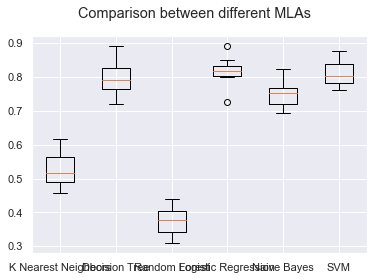

In [31]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train_vectors_bow, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# MLAs with tf-idf 

In [32]:
for name, model in models:
    model.fit(X_train_vectors_tfidf, y_train) 
    y_predict = model.predict(X_val_vectors_tfidf)
    y_prob = model.predict_proba(X_val_vectors_tfidf)[:,1]
 
    fpr,tpr,thresholds = metrics.roc_curve(y_val, y_prob,pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("{} Accuracy: {}".format(name, roc_auc))
   

K Nearest Neighbors Accuracy: 0.9175474984377701
Decision Tree Accuracy: 0.8098599976067967
Random Forest Accuracy: 0.5985069070506428
Logistic Regression Accuracy: 0.9510324013136028
Naive Bayes Accuracy: 0.9527874170688578
SVM Accuracy: 0.9500751199925545


# MLAs with bow

In [33]:
for name, model in models:
    model.fit(X_train_vectors_bow, y_train) 
    y_predict = model.predict(X_val_vectors_bow)
    y_prob = model.predict_proba(X_val_vectors_bow)[:,1]
    
    #print(classification_report(y_val,y_predict))
    #print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
    fpr,tpr,thresholds = metrics.roc_curve(y_val, y_prob,pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("{} Accuracy: {}".format(name, roc_auc))
   
   

K Nearest Neighbors Accuracy: 0.8351481791711539
Decision Tree Accuracy: 0.8341709544892506
Random Forest Accuracy: 0.5799662292422854
Logistic Regression Accuracy: 0.9430151702498238
Naive Bayes Accuracy: 0.961323175514871
SVM Accuracy: 0.9390663848005


# MLAs with W2vec

In [34]:
for name, model in modelss:
    model.fit(X_train_vectors_w2v, y_train) 
    y_predict = model.predict(X_val_vectors_w2v)
    y_prob = model.predict_proba(X_val_vectors_w2v)[:,1]
 
    fpr,tpr,thresholds = metrics.roc_curve(y_val, y_prob,pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("{} Accuracy: {}".format(name, roc_auc))
   

K Nearest Neighbors Accuracy: 0.5868533365242712
Decision Tree Accuracy: 0.5425391887040805
Random Forest Accuracy: 0.5837355244439126
Logistic Regression Accuracy: 0.6192413545530693
SVM Accuracy: 0.5229548083443022


# Naive Bayes with Hyperparameter tuning

In [35]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(bow)
model=MultinomialNB(alpha=1)
                                 
model.fit(X_train_vectors_bow, y_train) 
y_predict = model.predict(X_val_vectors_bow)
y_prob = model.predict_proba(X_val_vectors_bow)[:,1]

fpr,tpr,thresholds = metrics.roc_curve(y_val, y_prob,pos_label=1)
roc_auc = auc(fpr, tpr)
print("MultinomialNB Accuracy is:", roc_auc)
print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))

MultinomialNB Accuracy is: 0.961323175514871
              precision    recall  f1-score   support

           0       0.75      0.57      0.65       201
           1       0.86      0.83      0.84       183
           2       0.73      0.92      0.82       210

    accuracy                           0.77       594
   macro avg       0.78      0.77      0.77       594
weighted avg       0.78      0.77      0.77       594

Confusion Matrix: [[115  22  64]
 [ 24 151   8]
 [ 14   2 194]]


In [36]:
alpha_ranges = {"alpha":[10**-2,10**-1,10**0,10**1,10**2]}
grid_search =GridSearchCV(model , param_grid = alpha_ranges ,scoring= "accuracy",cv=5,return_train_score = True)
grid_search.fit(X_train_vectors_bow,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(alpha=1),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='accuracy')

In [37]:
alpha = [10**-2,10**-1,10**0,10**1,10**2]
train_acc = grid_search.cv_results_['mean_train_score']
train_std = grid_search.cv_results_['std_train_score']
test_acc = grid_search.cv_results_['mean_test_score']
test_std = grid_search.cv_results_['std_test_score']

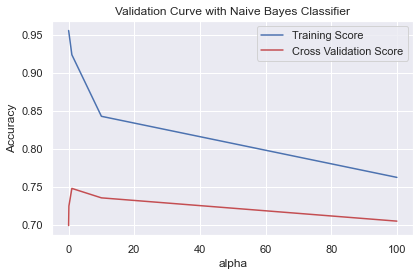

In [38]:
# Plot mean accuracy scores for training and testing scores
plt.plot(alpha, train_acc,
     label = "Training Score", color = 'b')
plt.plot(alpha, test_acc,
   label = "Cross Validation Score", color = 'r')

 
# Creating the plot
plt.title("Validation Curve with Naive Bayes Classifier")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [39]:
grid_search.best_estimator_


MultinomialNB(alpha=1)

In [40]:
#class arrangement
y_prob = model.predict_proba(X_val_vectors_bow)[:,1]
model.classes_

array([0, 1, 2], dtype=int64)

# model Prediction

In [44]:
le= LabelEncoder()
text=[str(input("حاسس بايه؟\n"))]
input_data_features = cv.transform(text)

#making prediction

prediction = model.predict(input_data_features)
proba=model.predict_proba(input_data_features)
#print (proba)

if max(proba[0]) > 0.5:

  if proba[0].tolist().index(max(proba[0])) == 0:
    print('من الممكن انك تعاني من الاكتئاب') 

  elif proba[0].tolist().index(max(proba[0])) == 1:
    print('من الممكن انك تعاني من اضطراب القلق')  

  elif proba[0].tolist().index(max(proba[0])) == 2:
    print('من الممكن انك تعاني من الميول الانتحاريه')

else:
    print('اخري')

حاسس بايه؟
حاسس انى حزين
من الممكن انك تعاني من اضطراب القلق


# model save

In [45]:
#save model 
from joblib import dump
dump(cv,r"D:\api_article\cv.joblib")
dump(model,r"D:\api_article\model00.joblib")


['D:\\api_article\\model00.joblib']

In [46]:
import pickle
with open('model_pickle','wb') as file:
    pickle.dump(model,file)